# # Is college worth it?

This project investigates if there is a correlation between the typical education level required for a job and the median average wage for that job in the U.S. Additionally, this project looks at predictors of college graduation rates to determine if school size, type, or selectivity make a difference in graduation rates.


#### Level of Education Vs Median Wage: Descriptive Statistics

We used a dataset from Bureau of labor statistics to find the correlation between the Level of Education and the Average annual wage. The data listed the information on 832 occupation categories. We used two variables from the dataset to study the relationship:

1. Typical Entry level Education
2. Median annual wage

In [1]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from sklearn import datasets
import scipy.stats as stats

In [2]:
# Read the csv file
college_data = pd.read_csv("Employment Projections.csv")

In [3]:
college_data.head()

,Occupation Title,Occupation Code,Employment 2021,Employment 2031,"Employment Change, 2021-2031","Employment Percent Change, 2021-2031","Occupational Openings, 2021-2031 Annual Average",Median Annual Wage 2021,Typical Entry-Level Education,Education Code,Work Experience in a Related Occupation,Workex Code,Typical on-the-job Training,trCode
0,Accountants and auditors * Account Auditor*...,"=""13-2011""","1,449.8","1,531.6",81.8,5.6,136.4,"77,250",Bachelor's degree,3,None,4,None,6
1,Actors * Actor Understudy* Actress* Dramati...,"=""27-2011""",50.6,54.7,4.1,8.2,7.0,NaN,"Some college, no degree",6,None,4,Long-term on-the-job training,3
2,Actuaries * Actuarial Associate* Actuarial ...,"=""15-2011""",28.3,34.2,5.9,20.8,2.4,"105,900",Bachelor's degree,3,None,4,Long-term on-the-job training,3
3,Acupuncturists,"=""29-1291""",23.7,24.6,0.9,3.9,1.7,"60,570",Master's degree,2,None,4,None,6
4,Adhesive bonding machine operators and tenders...,"=""51-9191""",12.7,12.9,0.2,1.5,1.6,"37,630",High school diploma or equivalent,7,None,4,Moderate-term on-the-job training,4


In [4]:
# Determine the datatype for the column 'Education Code'
college_data['Education Code'].dtypes

dtype('int64')

In [5]:
# Remove missing values from the dataframe
college_df = college_data.dropna(subset = ["Median Annual Wage 2021"])
college_df.columns

Index(['Occupation Title', 'Occupation Code', 'Employment 2021',
       'Employment 2031', 'Employment Change, 2021-2031',
       'Employment Percent Change, 2021-2031',
       'Occupational Openings, 2021-2031 Annual Average',
       'Median Annual Wage 2021', 'Typical Entry-Level Education',
       'Education Code', 'Work Experience in a Related Occupation',
       'Workex Code', 'Typical on-the-job Training', 'trCode'],
      dtype='object')

In [6]:
# Remove commas in the column 'Median Annual Wage 2021' 
college_df["Median Wage 2021"] = college_df["Median Annual Wage 2021"].str.replace(",","")
#in order to change wage to a float, we needed to get rid of commas and then change the values of '>=208000' to '208000'. 
#This affected 18 rows of data
college_df["Median Wage 2021"] = college_df["Median Wage 2021"].str.replace(">=208000","208000")

college_df["Median Wage 2021"] = college_df["Median Wage 2021"].astype(float)
# Use groupby to calculate the average Median wage for the year 2021.
college_df_mean = round(college_df.groupby("Typical Entry-Level Education")["Median Wage 2021"].mean(),2)
college_df_mean

C:\Users\bhart\AppData\Local\Temp\ipykernel_13796\2108379562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  college_df["Median Wage 2021"] = college_df["Median Annual Wage 2021"].str.replace(",","")
C:\Users\bhart\AppData\Local\Temp\ipykernel_13796\2108379562.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  college_df["Median Wage 2021"] = college_df["Median Wage 2021"].str.replace(">=208000","208000")
C:\Users\bhart\AppData\Local\Temp\ipykernel_13796\2108379562.py:7: SettingWithCopyWarning: 
A valu

Typical Entry-Level Education
Associate's degree                    59480.61
Bachelor's degree                     80170.89
Doctoral or professional degree      123650.14
High school diploma or equivalent     46071.43
Master's degree                       82992.56
No formal educational credential      36277.00
Postsecondary nondegree award         53101.20
Some college, no degree               40008.33
Name: Median Wage 2021, dtype: float64

In [7]:
# Use groupby to calculate the median for 'Median wage 2021'.
college_df_median = round(college_df.groupby("Typical Entry-Level Education")["Median Wage 2021"].median(),2)
college_df_median

Typical Entry-Level Education
Associate's degree                   60340.0
Bachelor's degree                    77030.0
Doctoral or professional degree      98070.0
High school diploma or equivalent    44810.0
Master's degree                      78780.0
No formal educational credential     32450.0
Postsecondary nondegree award        48315.0
Some college, no degree              39445.0
Name: Median Wage 2021, dtype: float64

In [8]:
# Put different education levels in a list to run the for loop.
degrees = ["No formal educational credential","High school diploma or equivalent","Some college, no degree","Associate's degree", 
          "Bachelor's degree", "Postsecondary nondegree award", "Master's degree","Doctoral or professional degree"
         ]
salary =[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the row for each Education level to get the median wage
for degree in degrees:
    wage = college_df.loc[college_df["Typical Entry-Level Education"] == degree, "Median Wage 2021"]
    salary.append(wage)
    quartiles = wage.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    print(f"{quartiles}")
    iqr = upperq - lowerq 
  # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = wage.loc[(wage < lower_bound) | (wage > upper_bound)]
    print(f"potential outliers:{degree} {outliers}")

0.25    29325.0
0.50    32450.0
0.75    38975.0
Name: Median Wage 2021, dtype: float64
potential outliers:No formal educational credential 45     61580.0
47     77300.0
156    60300.0
457    57900.0
695    56380.0
770    61080.0
810    61260.0
Name: Median Wage 2021, dtype: float64
0.25    37200.0
0.50    44810.0
0.75    49580.0
Name: Median Wage 2021, dtype: float64
potential outliers:High school diploma or equivalent 107     70200.0
204     83640.0
237     78310.0
244     97860.0
282     73060.0
300     72010.0
309     71260.0
310     79680.0
313     99330.0
354     76910.0
357     70720.0
358     77850.0
462     79740.0
546    104260.0
600     79540.0
617     76260.0
630     80250.0
633     98530.0
634     80850.0
727     80570.0
760     81180.0
802     79770.0
805     98230.0
Name: Median Wage 2021, dtype: float64
0.25    36832.5
0.50    39445.0
0.75    44412.5
Name: Median Wage 2021, dtype: float64
potential outliers:Some college, no degree Series([], Name: Median Wage 2021, dtype

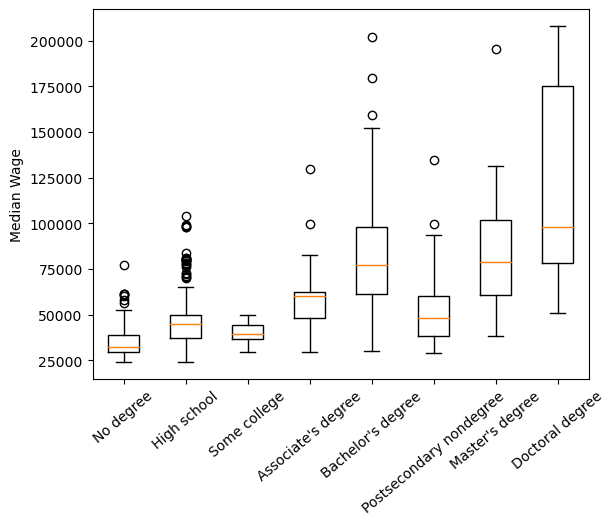

In [9]:
# Generate the boxplot to show the distribution of the median wage for each education level.
plt.boxplot(salary)
plt.ylabel("Median Wage")
plt.xticks([1,2,3,4,5,6,7,8], ["No degree","High school","Some college","Associate's degree", 
          "Bachelor's degree", "Postsecondary nondegree", "Master's degree","Doctoral degree"
         ],rotation = 40)
plt.show()

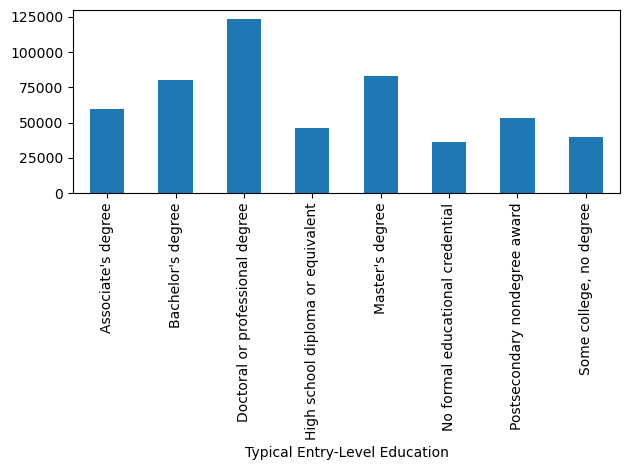

In [10]:
# Generate a bar chart to show the median wage for each education level
college_df_mean.plot(kind = 'bar')
plt.tight_layout()
plt.show()


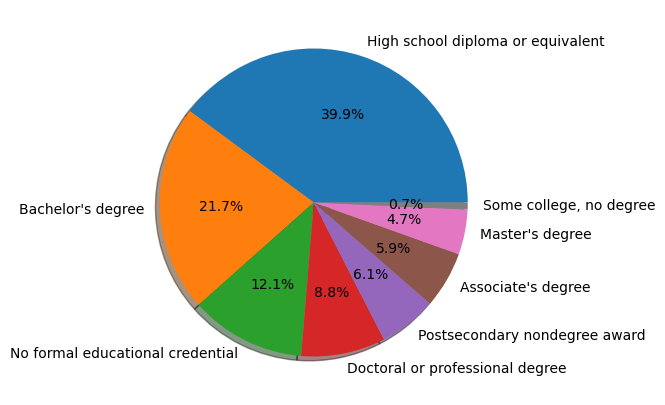

In [11]:
# Generate a pie chart to show the percentage of job openings for each education level.
college_df_Ed = college_df["Typical Entry-Level Education"]
College_Ed = college_df_Ed.value_counts()
College_Ed.plot(kind = 'pie',autopct='%1.1f%%', figsize=(5, 5), explode = (0,0,0,0,0,0,0,0),shadow = True)
plt.ylabel("")
plt.show()                   

# Correlation between the two variables:

The r value shows a strong correlation between the level of Education and the average salary. Higher the degree(or lower the level of Education), higher is the salary.On an average, a person with a doctoral degree earns higher than a someone with just a high school diploma or an associate's degree.

array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>,
        <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>],
       [<Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>,
        <Axes: >]], dtype=object)

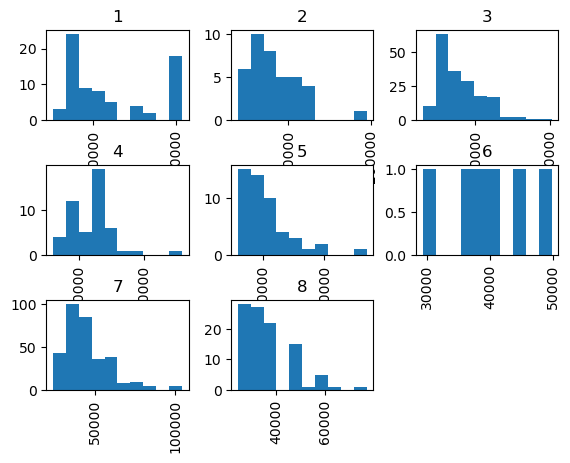

In [12]:
# Generate histograms to show the distribution of median wage for each education level.
college_df.hist( by = 'Education Code', column = 'Median Wage 2021')

#### Null Hypotheis: 

Entry Education level is not associated with Median annual wage.

#### Alternative Hypothesis:

Entry Education level is associated with Median annual wage.

In [13]:
# Extract individual groups
group_1 = college_df[college_df['Education Code'] == 1]['Median Wage 2021']
group_2 = college_df[college_df['Education Code'] == 2]['Median Wage 2021']
group_3 = college_df[college_df['Education Code'] == 3]['Median Wage 2021']
group_4 = college_df[college_df['Education Code'] == 4]['Median Wage 2021']
group_5 = college_df[college_df['Education Code'] == 5]['Median Wage 2021']
group_6 = college_df[college_df['Education Code'] == 6]['Median Wage 2021']
group_7 = college_df[college_df['Education Code'] == 7]['Median Wage 2021']
group_8 = college_df[college_df['Education Code'] == 8]['Median Wage 2021']

# Perform ANOVA to determine whether wage differs by group

stats.f_oneway(group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8)

F_onewayResult(statistic=119.30217527351954, pvalue=2.2189017506902747e-120)

### Conclusion:
The null hypothesis is rejected based on the low p-value.Median annual wage differs significantly across Education level.The average wage for jobs that require the doctoral degree is the highest while it is lowest for the jobs that require no formal education.

### What institutional factors predict graduation rates?

We are using the dataset from 'Integrated Post Secondary Education Data System'(IPEDS).The data listed information on 1367 four year degree granting institutions in the United States. We used different variables for our analysis including:

1. Percentage of students admitted in 2015 who had graduated by 2021.
2. Type of institution(Public/Private).
3. Total Cost.
4. Total Enrollment.
5. Percent Admitted





In [14]:
# Read the csv file from IPEDS
grad_df = pd.read_csv("Data_6-9-2023---124.csv")
grad_df.head()

,UnitID,Institution Name,Sector of institution (HD2015),Percent admitted - total (DRVADM2015_RV),Admissions yield - full time (DRVADM2015_RV),Total enrollment (DRVEF2015_RV),Graduation rate total cohort (DRVGR2015_RV),Sector of institution (HD2014),Total price for in-district students living off campus (not with family) 2014-15 (DRVIC2014),Total price for in-state students living off campus (not with family) 2014-15 (DRVIC2014),...,Total price for in-district students living off campus (not with family) 2013-14 (DRVIC2013_RV),Total price for in-state students living off campus (not with family) 2013-14 (DRVIC2013_RV),Total price for out-of-state students living off campus (not with family) 2013-14 (DRVIC2013_RV),Percent admitted - total (DRVIC2013_RV),Admissions yield - full time (DRVIC2013_RV),Total enrollment (DRVEF2013_RV),Graduation rate total cohort (DRVGR2013_RV),Total price for in-district students living off campus (not with family) 2012-13 (DRVIC2012_RV),Total price for in-state students living off campus (not with family) 2012-13 (DRVIC2012_RV),Total price for out-of-state students living off campus (not with family) 2012-13 (DRVIC2012_RV)
0,180203,Aaniiih Nakoda College,4.0,NaN,NaN,219.0,31.0,4.0,17030.0,17030.0,...,17030.0,17030.0,17030.0,NaN,NaN,139.0,42.0,17030.0,17030.0,17030.0
1,222178,Abilene Christian University,2.0,50.0,20.0,4544.0,61.0,2.0,43100.0,43100.0,...,41800.0,41800.0,41800.0,49.0,21.0,4461.0,56.0,39900.0,39900.0,39900.0
2,497037,Abilene Christian University-Undergraduate Online,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,138558,Abraham Baldwin Agricultural College,1.0,77.0,55.0,3393.0,18.0,1.0,12504.0,12504.0,...,13188.0,13188.0,20856.0,71.0,75.0,3394.0,16.0,12619.0,12619.0,18753.0
4,488031,Abraham Lincoln University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Drop the missing  values
grad = grad_df.dropna()
grad

,UnitID,Institution Name,Sector of institution (HD2015),Percent admitted - total (DRVADM2015_RV),Admissions yield - full time (DRVADM2015_RV),Total enrollment (DRVEF2015_RV),Graduation rate total cohort (DRVGR2015_RV),Sector of institution (HD2014),Total price for in-district students living off campus (not with family) 2014-15 (DRVIC2014),Total price for in-state students living off campus (not with family) 2014-15 (DRVIC2014),...,Total price for in-district students living off campus (not with family) 2013-14 (DRVIC2013_RV),Total price for in-state students living off campus (not with family) 2013-14 (DRVIC2013_RV),Total price for out-of-state students living off campus (not with family) 2013-14 (DRVIC2013_RV),Percent admitted - total (DRVIC2013_RV),Admissions yield - full time (DRVIC2013_RV),Total enrollment (DRVEF2013_RV),Graduation rate total cohort (DRVGR2013_RV),Total price for in-district students living off campus (not with family) 2012-13 (DRVIC2012_RV),Total price for in-state students living off campus (not with family) 2012-13 (DRVIC2012_RV),Total price for out-of-state students living off campus (not with family) 2012-13 (DRVIC2012_RV)
1,222178,Abilene Christian University,2.0,50.0,20.0,4544.0,61.0,2.0,43100.0,43100.0,...,41800.0,41800.0,41800.0,49.0,21.0,4461.0,56.0,39900.0,39900.0,39900.0
3,138558,Abraham Baldwin Agricultural College,1.0,77.0,55.0,3393.0,18.0,1.0,12504.0,12504.0,...,13188.0,13188.0,20856.0,71.0,75.0,3394.0,16.0,12619.0,12619.0,18753.0
8,126182,Adams State University,1.0,64.0,25.0,3404.0,27.0,1.0,21064.0,21064.0,...,20391.0,20391.0,31023.0,53.0,36.0,3211.0,23.0,19309.0,19309.0,30277.0
9,188429,Adelphi University,2.0,72.0,13.0,7256.0,67.0,2.0,48900.0,48900.0,...,47110.0,47110.0,47110.0,68.0,15.0,7645.0,63.0,45200.0,45200.0,45200.0
11,168528,Adrian College,2.0,61.0,16.0,1715.0,54.0,2.0,41182.0,41182.0,...,38330.0,38330.0,38330.0,56.0,19.0,1655.0,54.0,36503.0,36503.0,36503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,197735,Yeshivath Viznitz,2.0,100.0,100.0,651.0,84.0,2.0,25314.0,25314.0,...,24460.0,24460.0,24460.0,100.0,100.0,604.0,74.0,23676.0,23676.0,23676.0
2372,197744,Yeshivath Zichron Moshe,2.0,100.0,100.0,178.0,25.0,2.0,28814.0,28814.0,...,27760.0,27760.0,27760.0,100.0,100.0,198.0,0.0,27476.0,27476.0,27476.0
2373,181853,York College,2.0,44.0,41.0,410.0,42.0,2.0,25430.0,25430.0,...,26200.0,26200.0,26200.0,49.0,35.0,470.0,39.0,26200.0,26200.0,26200.0
2374,217059,York College of Pennsylvania,2.0,43.0,16.0,4739.0,57.0,2.0,31200.0,31200.0,...,30290.0,30290.0,30290.0,74.0,15.0,5250.0,58.0,29220.0,29220.0,29220.0


In [16]:
# Read column names
grad.columns


Index(['UnitID', 'Institution Name', 'Sector of institution (HD2015)',
       'Percent admitted - total (DRVADM2015_RV)',
       'Admissions yield - full time (DRVADM2015_RV)',
       'Total  enrollment (DRVEF2015_RV)',
       'Graduation rate  total cohort (DRVGR2015_RV)',
       'Sector of institution (HD2014)',
       'Total price for in-district students living off campus (not with family)  2014-15 (DRVIC2014)',
       'Total price for in-state students living off campus (not with family)  2014-15 (DRVIC2014)',
       'Total price for out-of-state students living off campus (not with family)  2014-15 (DRVIC2014)',
       'Percent admitted - total (DRVADM2014_RV)',
       'Admissions yield - full time (DRVADM2014_RV)',
       'Total  enrollment (DRVEF2014_RV)',
       'Graduation rate  total cohort (DRVGR2014_RV)',
       'Sector of institution (HD2013)',
       'Total price for in-district students living off campus (not with family)  2013-14 (DRVIC2013_RV)',
       'Total price fo

In [17]:
# Clean the dataframe by dropping the columns not required for analysis
grad_2015 = grad[["UnitID","Institution Name","Sector of institution (HD2015)","Percent admitted - total (DRVADM2015_RV)",
                "Total  enrollment (DRVEF2015_RV)","Graduation rate  total cohort (DRVGR2015_RV)",
               "Total price for in-state students living off campus (not with family)  2014-15 (DRVIC2014)"]]
grad_2015

,UnitID,Institution Name,Sector of institution (HD2015),Percent admitted - total (DRVADM2015_RV),Total enrollment (DRVEF2015_RV),Graduation rate total cohort (DRVGR2015_RV),Total price for in-state students living off campus (not with family) 2014-15 (DRVIC2014)
1,222178,Abilene Christian University,2.0,50.0,4544.0,61.0,43100.0
3,138558,Abraham Baldwin Agricultural College,1.0,77.0,3393.0,18.0,12504.0
8,126182,Adams State University,1.0,64.0,3404.0,27.0,21064.0
9,188429,Adelphi University,2.0,72.0,7256.0,67.0,48900.0
11,168528,Adrian College,2.0,61.0,1715.0,54.0,41182.0
...,...,...,...,...,...,...,...
2371,197735,Yeshivath Viznitz,2.0,100.0,651.0,84.0,25314.0
2372,197744,Yeshivath Zichron Moshe,2.0,100.0,178.0,25.0,28814.0
2373,181853,York College,2.0,44.0,410.0,42.0,25430.0
2374,217059,York College of Pennsylvania,2.0,43.0,4739.0,57.0,31200.0


In [18]:
# Generate descriptive statistics for graduation rate across institutions
grad_2015["Graduation rate  total cohort (DRVGR2015_RV)"].describe()

count    1367.000000
mean       54.626920
std        17.665878
min         0.000000
25%        42.000000
50%        55.000000
75%        67.000000
max       100.000000
Name: Graduation rate  total cohort (DRVGR2015_RV), dtype: float64

In [19]:
# Separate public institutions from private institutions
type_public = grad_2015.loc[(grad_2015["Sector of institution (HD2015)"] == 1.0) | (grad_2015["Sector of institution (HD2015)"]== 4.0)]
type_public["Sector of institution (HD2015)"].value_counts()

1.0    465
Name: Sector of institution (HD2015), dtype: int64

In [20]:
type_private = grad_2015.loc[(grad_2015["Sector of institution (HD2015)"] == 2.0) | (grad_2015["Sector of institution (HD2015)"]== 3.0)]
type_private

,UnitID,Institution Name,Sector of institution (HD2015),Percent admitted - total (DRVADM2015_RV),Total enrollment (DRVEF2015_RV),Graduation rate total cohort (DRVGR2015_RV),Total price for in-state students living off campus (not with family) 2014-15 (DRVIC2014)
1,222178,Abilene Christian University,2.0,50.0,4544.0,61.0,43100.0
9,188429,Adelphi University,2.0,72.0,7256.0,67.0,48900.0
11,168528,Adrian College,2.0,61.0,1715.0,54.0,41182.0
12,133872,AdventHealth University,2.0,60.0,1984.0,16.0,30650.0
13,138600,Agnes Scott College,2.0,62.0,902.0,68.0,40482.0
...,...,...,...,...,...,...,...
2371,197735,Yeshivath Viznitz,2.0,100.0,651.0,84.0,25314.0
2372,197744,Yeshivath Zichron Moshe,2.0,100.0,178.0,25.0,28814.0
2373,181853,York College,2.0,44.0,410.0,42.0,25430.0
2374,217059,York College of Pennsylvania,2.0,43.0,4739.0,57.0,31200.0


In [21]:
type_private["Sector of institution (HD2015)"].value_counts()

2.0    863
3.0     31
Name: Sector of institution (HD2015), dtype: int64

#### Null Hypothesis:
There is no difference in graduation rates between public and private institutions.
#### Alternative Hypothesis:
There is a difference in graduation rates between public and private institutions.

In [22]:
# Run a ttest on graduation rates for public and private institutes
stats.ttest_ind(type_public['Graduation rate  total cohort (DRVGR2015_RV)'],type_private['Graduation rate  total cohort (DRVGR2015_RV)'], equal_var=False)

Ttest_indResult(statistic=-6.164301805216337, pvalue=1.038344477349493e-09)

We reject the null hypothesis because the p value is below 0.05.

In [23]:
# Calculate the average graduation rate for public institutes
type_public['Graduation rate  total cohort (DRVGR2015_RV)'].mean()

50.60215053763441

In [24]:
# # Calculate the average graduation rate for private institutes
type_private['Graduation rate  total cohort (DRVGR2015_RV)'].mean()

56.671140939597315

In [25]:
# Calculate the median graduation rate for public institutes
public_grad = type_public['Graduation rate  total cohort (DRVGR2015_RV)'].median()
public_grad

49.0

In [26]:
# Calculate the median graduation rate for private institutes
private_grad = type_private['Graduation rate  total cohort (DRVGR2015_RV)'].median()
private_grad 

57.0

In [27]:
# Prepare data to generate a boxplot
grad_rate_public = []
grad_rate_private = []
for row in grad_2015.index:
    if (grad_2015["Sector of institution (HD2015)"][row] == 1):
        grad_rate_public.append(grad_2015["Graduation rate  total cohort (DRVGR2015_RV)"][row])
    if (grad_2015["Sector of institution (HD2015)"][row] == 4):
        grad_rate_public.append(grad_2015["Graduation rate  total cohort (DRVGR2015_RV)"][row])
    if (grad_2015["Sector of institution (HD2015)"][row] == 2):
        grad_rate_private.append(grad_2015["Graduation rate  total cohort (DRVGR2015_RV)"][row])
    if (grad_2015["Sector of institution (HD2015)"][row] == 3):
        grad_rate_private.append(grad_2015["Graduation rate  total cohort (DRVGR2015_RV)"][row])
grad_rate_public
grad_rate_private
quartiles = np.quantile(grad_rate_public, [.25, .5, .75])
lowerq = quartiles[0]
upperq = quartiles[2]
iqr_public = upperq-lowerq
private_quartiles = np.quantile(grad_rate_private, [.25, .5, .75])
private_lowerq = private_quartiles[0]
private_upperq = private_quartiles[2]
iqr_private = private_upperq-private_lowerq

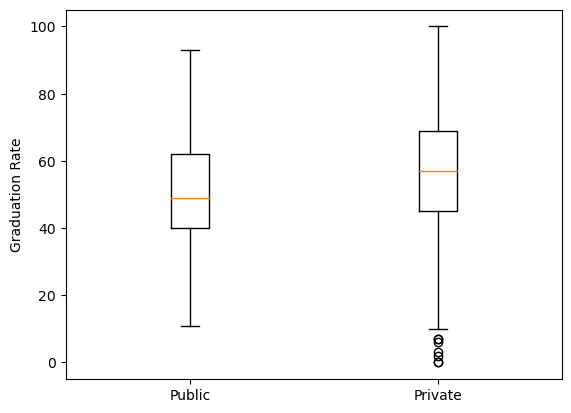

In [28]:
# Generate a boxplot
plt.boxplot([grad_rate_public,grad_rate_private])
plt.ylabel("Graduation Rate")
plt.xticks([1,2], ["Public","Private"])

plt.show()

In [29]:
# Define a function to create Linear Regression plots
def Lin_regress(df,x_value,y_value,xlabel,ylabel,a,b):
    x = df[x_value]
    y = df[y_value]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,5))
    print(line_eq)
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

y = 0.00068x + 30.60263
The r-value is: 0.23928521788119028


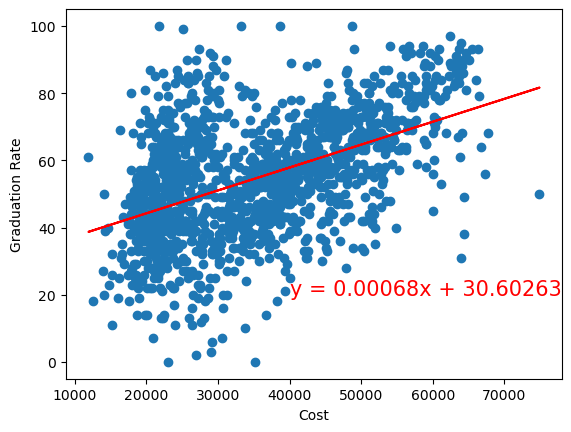

In [30]:
# Linear regression on Graduation rate and cost
Lin_regress(grad_2015,'Total price for in-state students living off campus (not with family)  2014-15 (DRVIC2014)',
             'Graduation rate  total cohort (DRVGR2015_RV)','Cost','Graduation Rate',40000,20)

y = 0.0023x + -2.04393
The r-value is: 0.2345139645324551


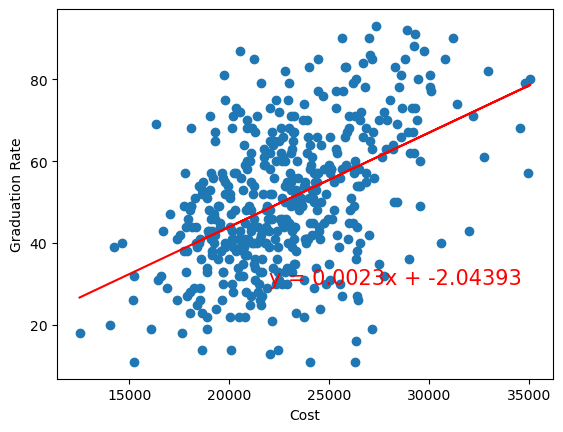

In [31]:
# Linear regression on Graduation rate and cost for public institutes
Lin_regress(type_public,'Total price for in-state students living off campus (not with family)  2014-15 (DRVIC2014)',
             'Graduation rate  total cohort (DRVGR2015_RV)','Cost','Graduation Rate',22000,30)

y = 0.00097x + 16.08374
The r-value is: 0.3584096809399083


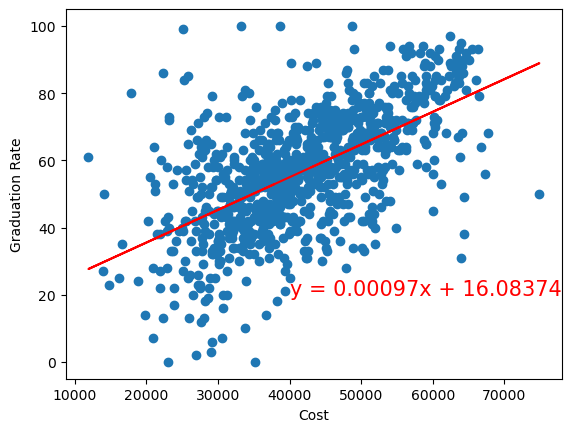

In [32]:
# Linear regression on Graduation rate and cost for private institutes
Lin_regress(type_private,'Total price for in-state students living off campus (not with family)  2014-15 (DRVIC2014)',
             'Graduation rate  total cohort (DRVGR2015_RV)','Cost','Graduation Rate',40000,20)

y = 0.00036x + 52.03866
The r-value is: 0.042495399725870096


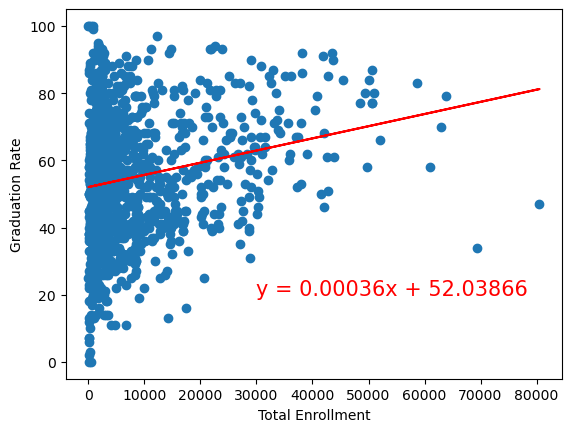

In [33]:
# Linear regression on Graduation rate and total enrollment
Lin_regress(grad_2015,'Total  enrollment (DRVEF2015_RV)',
             'Graduation rate  total cohort (DRVGR2015_RV)','Total Enrollment','Graduation Rate',30000,20)

In [34]:
# Generate descriptive statistics for enrollment numbers across institutions
grad_2015['Total  enrollment (DRVEF2015_RV)'].describe()

count     1367.000000
mean      7143.463789
std      10050.942780
min         17.000000
25%       1371.000000
50%       2961.000000
75%       8429.500000
max      80494.000000
Name: Total  enrollment (DRVEF2015_RV), dtype: float64

y = 0.00076x + 39.64909
The r-value is: 0.2924383155294236


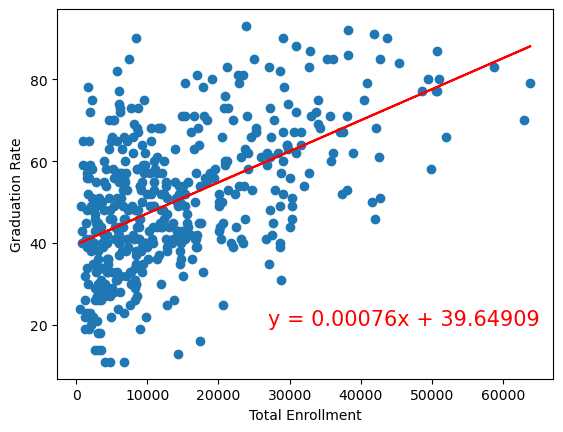

In [35]:
# Linear regression on Graduation rate and total enrollment for public institutions
Lin_regress(type_public,'Total  enrollment (DRVEF2015_RV)',
             'Graduation rate  total cohort (DRVGR2015_RV)','Total Enrollment','Graduation Rate',27000,20)

y = 0.00059x + 54.65492
The r-value is: 0.04058707728711047


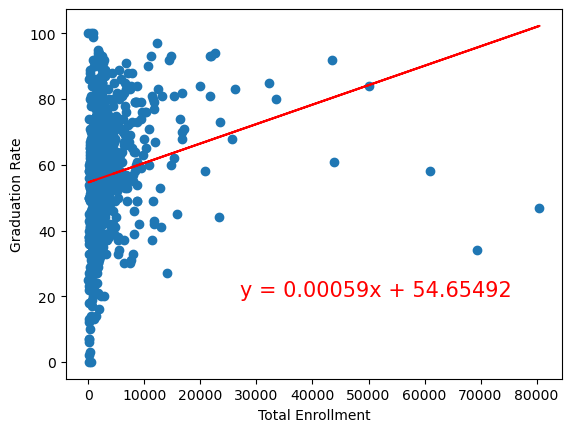

In [36]:
# Linear regression on Graduation rate and Total Enrollment for private institutions
Lin_regress(type_private,'Total  enrollment (DRVEF2015_RV)',
             'Graduation rate  total cohort (DRVGR2015_RV)','Total Enrollment','Graduation Rate',27000,20)

y = -0.24893x + 71.33494
The r-value is: 0.06862098191697336


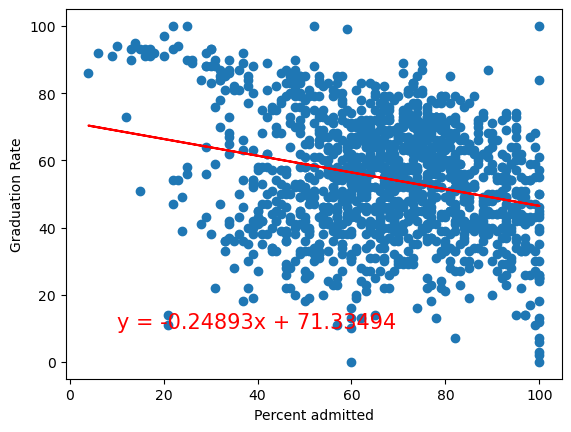

In [37]:
# # Linear regression on Graduation rate and Percent admitted
Lin_regress(grad_2015,'Percent admitted - total (DRVADM2015_RV)',
             'Graduation rate  total cohort (DRVGR2015_RV)','Percent admitted','Graduation Rate',10,10)

y = -0.28869x + 70.67787
The r-value is: 0.0848655113542948


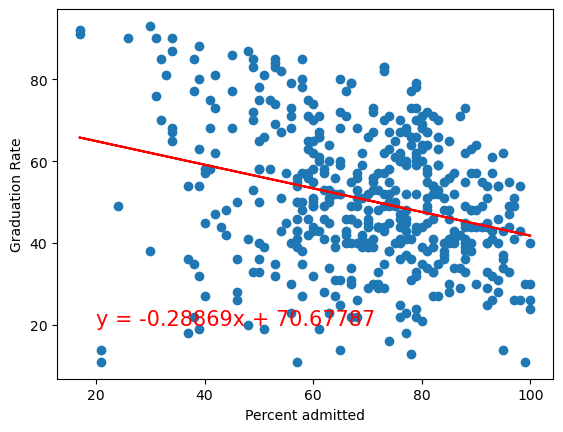

In [38]:
# Linear regression on Graduation rate and Percent admitted for public institutions
Lin_regress(type_public,'Percent admitted - total (DRVADM2015_RV)',
             'Graduation rate  total cohort (DRVGR2015_RV)','Percent admitted','Graduation Rate',20,20)

y = -0.21002x + 70.48847
The r-value is: 0.052166590575107356


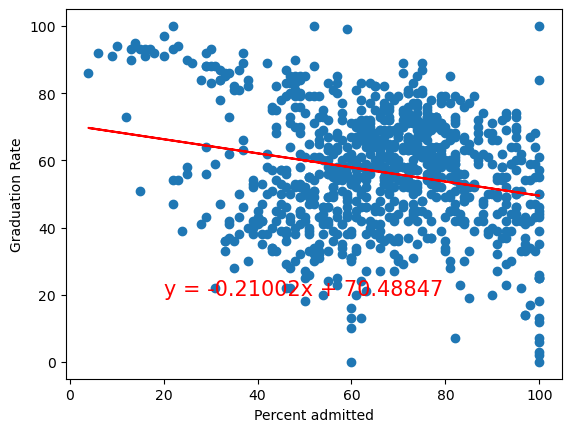

In [39]:
# Linear regression on Graduation rate and Percent admitted for private institutions
Lin_regress(type_private,'Percent admitted - total (DRVADM2015_RV)',
             'Graduation rate  total cohort (DRVGR2015_RV)','Percent admitted','Graduation Rate',20,20)